In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
13 = layers = [[N,64,128,128,64,64,32,32],[32,64,128,64,32,N]]

0.7 [[N,64,128,128,64,64,32,N],[N,N,N,N]]


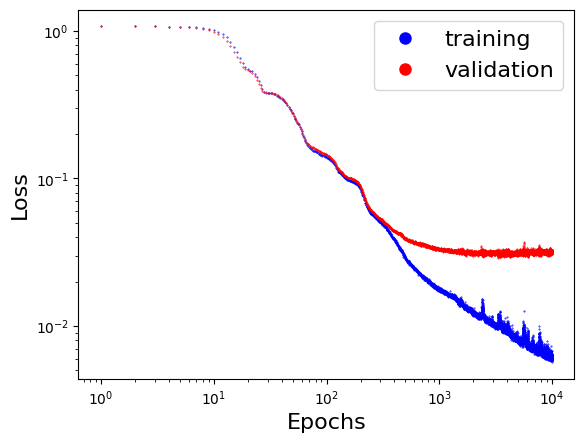

In [272]:
##### 
L = 5
epsilon = 0.0
alpha = 0.1
best = 0 
best_v = 10

for nbr in range(4):
    train_loss = np.load('results/{}/{}/{}/train_loss{}.npy'.format(L,epsilon,alpha,nbr))
    test_loss = np.load('results/{}/{}/{}/test_loss{}.npy'.format(L,epsilon,alpha,nbr))
    if test_loss[-1]< best_v:
        best = nbr
        best_v = test_loss[-1]


train_loss = np.load('results/{}/{}/{}/train_loss{}.npy'.format(L,epsilon,alpha,best))
test_loss = np.load('results/{}/{}/{}/test_loss{}.npy'.format(L,epsilon,alpha,best))
fontsize = 16
plt.figure()   
plt.yscale('log')
plt.xscale('log')
plt.plot(train_loss,'b.',label='training',markersize=0.8)
plt.plot(test_loss,'r.',label='validation',markersize=0.8)
plt.legend(fontsize=fontsize,markerscale=20)
plt.ylabel('Loss',fontsize=fontsize)
plt.xlabel('Epochs',fontsize=fontsize)
plt.savefig('results/plot_final/loss_{}_{}_{}.pdf'.format(epsilon,alpha,nbr))

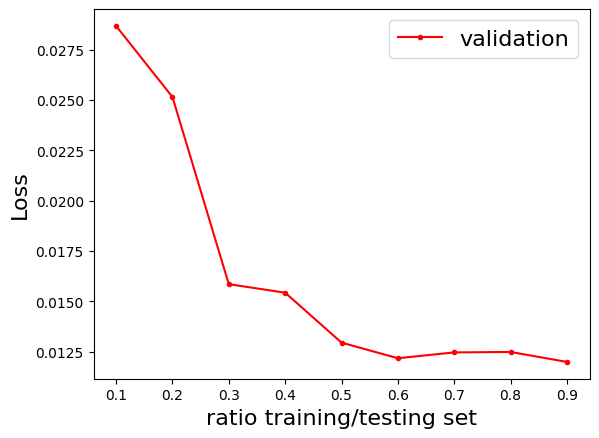

In [269]:
##### 
L = 5
epsilon = 0.0

values = np.zeros((9,2))

for a in range(1,10):
  
    alpha = a/10
    best = 0 
    best_v = 10
    for nbr in range(4):
        train_loss = np.load('results/{}/{}/{}/train_loss{}.npy'.format(L,epsilon,alpha,nbr))
        test_loss = np.load('results/{}/{}/{}/test_loss{}.npy'.format(L,epsilon,alpha,nbr))
        if np.min(test_loss)< best_v:
            best = nbr
            best_v = np.min(test_loss)
    
    
    train_loss = np.load('results/{}/{}/{}/train_loss{}.npy'.format(L,epsilon,alpha,best))
    test_loss = np.load('results/{}/{}/{}/test_loss{}.npy'.format(L,epsilon,alpha,best))
    values[a-1,:] = np.min(train_loss), np.min(test_loss)
fontsize = 16
plt.figure()   


# plt.plot(np.arange(1,10)/10,values[:,0],'b.-',label='training')
plt.plot(np.arange(1,10)/10,values[:,1],'r.-',label='validation')
plt.legend(fontsize=fontsize,markerscale=1)

plt.ylabel('Loss',fontsize=fontsize)
plt.xlabel('ratio training/testing set',fontsize=fontsize)
plt.savefig('results/plot_final/loss_size{}_{}_{}.pdf'.format(epsilon,alpha,nbr))

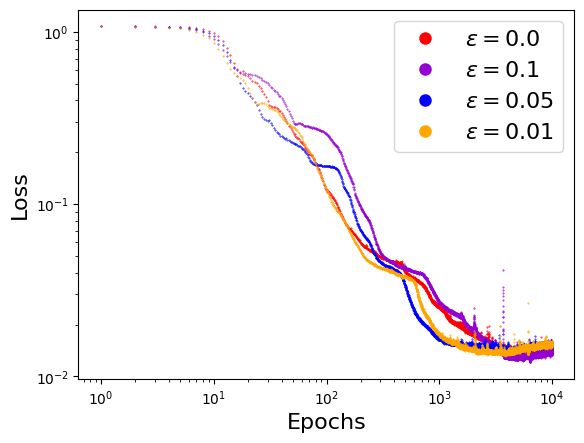

In [271]:
##### 
L = 5
epsilon = 0.0
alpha = 0.8
best = 0 
best_v = 10

colors = ['red','darkviolet','blue','orange']
fontsize = 16
plt.figure()   
plt.yscale('log')
plt.xscale('log')
for _,epsilon in enumerate([0.0,0.1,0.05,0.01]):
    best = 0 
    best_v = 10

    for nbr in range(4):
        train_loss = np.load('results/{}/{}/{}/train_loss{}.npy'.format(L,epsilon,alpha,nbr))
        test_loss = np.load('results/{}/{}/{}/test_loss{}.npy'.format(L,epsilon,alpha,nbr))
        if test_loss[-1]< best_v:
            best = nbr
            best_v = test_loss[-1]


    train_loss = np.load('results/{}/{}/{}/train_loss{}.npy'.format(L,epsilon,alpha,best))
    test_loss = np.load('results/{}/{}/{}/test_loss{}.npy'.format(L,epsilon,alpha,best))
    
    # plt.plot(train_loss,'b.',label='training',markersize=0.8)
    plt.plot(test_loss,'.',color=colors[_],label=r'$\epsilon={}$'.format(epsilon),markersize=0.8)
    
plt.legend(fontsize=fontsize,markerscale=20)
plt.ylabel('Loss',fontsize=fontsize)
plt.xlabel('Epochs',fontsize=fontsize)
plt.savefig('results/plot_final/loss_noise{}_{}_{}.pdf'.format(epsilon,alpha,nbr))